In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor
from scipy import stats
from scipy.stats import shapiro
from scipy.stats.mstats import winsorize
plt.rcParams['font.family'] = 'Malgun Gothic'
plt.rcParams['axes.unicode_minus'] = False

In [2]:
df = pd.read_csv('../../dataset/윈저데이터셋.csv', encoding='CP949')
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10652 entries, 0 to 10651
Data columns (total 58 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   회사명               10652 non-null  object 
 1   거래소코드             10652 non-null  int64  
 2   회계년도              10652 non-null  object 
 3   상장일               10652 non-null  object 
 4   상장폐지일             698 non-null    object 
 5   산업명               10652 non-null  object 
 6   소속코드              10652 non-null  int64  
 7   [제조]매출액증가율        10652 non-null  float64
 8   [제조]유형자산증가율       10652 non-null  float64
 9   [제조]비유동자산증가율      10652 non-null  float64
 10  [제조]총자본증가율        10652 non-null  float64
 11  [제조]자기자본증가율       10652 non-null  float64
 12  [제조]유동자산증가율       10652 non-null  float64
 13  [제조]순이익증가율        10652 non-null  float64
 14  [제조]재고자산증가율       10652 non-null  float64
 15  [제조]매출액총이익률       10652 non-null  float64
 16  [제조]매출액순이익률       10652 non-null  float6

In [3]:
df.columns

Index(['회사명', '거래소코드', '회계년도', '상장일', '상장폐지일', '산업명', '소속코드', '[제조]매출액증가율',
       '[제조]유형자산증가율', '[제조]비유동자산증가율', '[제조]총자본증가율', '[제조]자기자본증가율',
       '[제조]유동자산증가율', '[제조]순이익증가율', '[제조]재고자산증가율', '[제조]매출액총이익률',
       '[제조]매출액순이익률', '[제조]총자본사업이익률', '[제조]총자본순이익률', '[제조]자기자본순이익률',
       '[제조]1주당순이익', '[제조]1주당매출액', '[제조]총자본회전률', '[제조]자기자본회전률', '[제조]비유동자산회전률',
       '[제조]재고자산회전률', '[제조]매출채권회전률', '[제조]매입채무회전률', '[제조]매입채무회전기간',
       '[제조]재고자산회전기간', '[제조]매출채권회전기간', '[제조]1회전기간', '[제조]운전자본회전률',
       '[제조]순운전자본회전률', '[제조]유동자산회전률', '[제조]당좌자산회전률', '[제조]유동비율', '[제조]당좌비율',
       '[제조]현금비율', '[제조]부채비율', '[제조]순운전자본비율', '[제조]자기자본배율', '[제조]비유동비율',
       '[제조]유동자산구성비율', '[제조]자기자본구성비율', '[제조]부가가치', '[제조]총자본투자효율', '[제조]설비투자효율',
       '[제조]기계투자효율', '[제조]부가가치율', '[제조]노동소득분배율', '[제조]자본분배율', '[제조]이윤분배율',
       '[제조]유형자산회전율', '[제조]이자보상배율(이자비용)', 'year', 'month', 'label'],
      dtype='object')

In [4]:
df_1 = df[[ '[제조]매출액증가율',
       '[제조]유형자산증가율', '[제조]비유동자산증가율', '[제조]총자본증가율', '[제조]자기자본증가율',
       '[제조]유동자산증가율', '[제조]순이익증가율', '[제조]재고자산증가율', '[제조]매출액총이익률',
       '[제조]매출액순이익률', '[제조]총자본사업이익률', '[제조]총자본순이익률', '[제조]자기자본순이익률',
       '[제조]1주당순이익', '[제조]1주당매출액', '[제조]총자본회전률', '[제조]자기자본회전률', '[제조]비유동자산회전률',
       '[제조]재고자산회전률', '[제조]매출채권회전률', '[제조]매입채무회전률', '[제조]매입채무회전기간',
       '[제조]재고자산회전기간', '[제조]매출채권회전기간', '[제조]1회전기간', '[제조]운전자본회전률',
       '[제조]순운전자본회전률', '[제조]유동자산회전률', '[제조]당좌자산회전률', '[제조]유동비율', '[제조]당좌비율',
       '[제조]현금비율', '[제조]부채비율', '[제조]순운전자본비율', '[제조]자기자본배율', '[제조]비유동비율',
       '[제조]유동자산구성비율', '[제조]자기자본구성비율', '[제조]부가가치', '[제조]총자본투자효율', '[제조]설비투자효율',
       '[제조]기계투자효율', '[제조]부가가치율', '[제조]노동소득분배율', '[제조]자본분배율', '[제조]이윤분배율',
       '[제조]유형자산회전율', '[제조]이자보상배율(이자비용)','label']]

In [5]:
from sklearn.preprocessing import StandardScaler

In [6]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(df_1)

df_scaled = scaler.transform(df_1)

df_scaled_df = pd.DataFrame(df_scaled,columns = df_1.columns)

In [7]:
df_1['label']

0        0
1        0
2        0
3        0
4        0
        ..
10647    0
10648    0
10649    0
10650    0
10651    0
Name: label, Length: 10652, dtype: int64

In [8]:
from sklearn.linear_model import LogisticRegression
from sklearn.feature_selection import SelectFromModel
import statsmodels.api as sm
import numpy as np
lr_clf = LogisticRegression()

feature = df_scaled_df.drop(columns='label')
target = df_1['label']

logit = SelectFromModel(LogisticRegression())
logit.fit(feature, target)
logit_support = logit.get_support()
lr_feature = feature.loc[:,logit_support].columns.tolist()


In [13]:
df_lr = df[['[제조]총자본증가율',
 '[제조]총자본사업이익률',
 '[제조]1주당매출액',
 '[제조]비유동자산회전률',
 '[제조]매출채권회전률',
 '[제조]매출채권회전기간',
 '[제조]순운전자본회전률',
 '[제조]당좌비율',
 '[제조]현금비율',
 '[제조]순운전자본비율',
 '[제조]자기자본배율',
 '[제조]노동소득분배율',
 '[제조]이윤분배율',
 '[제조]이자보상배율(이자비용)']]

In [14]:
def vif(data):
    import pandas as pd
    from statsmodels.stats.outliers_influence import variance_inflation_factor

    # VIF 출력을 위한 데이터 프레임 형성
    vif = pd.DataFrame()

    # VIF 값과 각 Feature 이름에 대해 설정
    vif["VIF Factor"] = [variance_inflation_factor(data.values, i) for i in range(len(data.columns))]
    vif["features"] = data.columns 

    # VIF 값이 높은 순으로 정렬
    vif = vif.sort_values(by="VIF Factor", ascending=False)
    vif = vif.reset_index().drop(columns='index')
    
    return vif

vif(df_lr)

,VIF Factor,features
0,8.981055,[제조]당좌비율
1,8.531406,[제조]순운전자본회전률
2,7.273617,[제조]순운전자본비율
3,5.961152,[제조]비유동자산회전률
4,4.685052,[제조]노동소득분배율
5,4.677259,[제조]자기자본배율
6,4.643679,[제조]현금비율
7,4.421985,[제조]매출채권회전률
8,4.186190,[제조]1주당매출액
9,3.525085,[제조]매출채권회전기간


In [106]:
df_LR_feature= df_scaled_df[['[제조]총자본증가율',
 '[제조]총자본사업이익률',
 '[제조]1주당매출액',
 '[제조]비유동자산회전률',
 '[제조]매출채권회전률',
 '[제조]순운전자본회전률',
 '[제조]현금비율',
 '[제조]자기자본배율',
 '[제조]노동소득분배율',
 '[제조]이자보상배율(이자비용)']]
df_LR_feature

,[제조]총자본증가율,[제조]총자본사업이익률,[제조]1주당매출액,[제조]비유동자산회전률,[제조]매출채권회전률,[제조]순운전자본회전률,[제조]현금비율,[제조]자기자본배율,[제조]노동소득분배율,[제조]이자보상배율(이자비용)
0,-0.312498,-0.044708,-0.875983,-0.476984,-1.023704,-0.289160,-0.637146,-1.082167,0.643308,-0.257758
1,2.595224,-1.393153,-0.883887,-0.416649,-1.148244,-1.205198,0.069573,-1.068042,2.826654,-0.278270
2,-0.482313,-0.012576,-0.894336,-0.422682,-1.102579,-1.205198,2.955926,-1.049306,0.215319,-0.262904
3,-0.234058,-0.185425,-0.891420,-0.730391,-1.146168,-0.913732,0.496289,-1.049295,0.400457,-0.257631
4,-0.505261,-0.800369,-0.886733,-0.766592,-1.096352,-0.518170,-0.454249,-1.056938,1.896343,-0.322768
...,...,...,...,...,...,...,...,...,...,...
10647,-0.337115,-0.174345,0.111030,0.041898,2.766467,2.146668,-0.308458,2.647877,-0.320245,-0.250248
10648,-0.354222,-0.216449,0.194691,0.150501,2.766467,2.146668,-0.602277,2.647877,-0.330633,-0.253430
10649,-0.640863,-0.153293,0.271301,0.271172,2.766467,2.146668,0.554580,2.647877,-0.334327,-0.241156
10650,0.073863,-0.227529,0.159954,0.162568,2.766467,2.146668,-0.181219,2.647877,-0.917907,0.194108


In [107]:
def vif(data):
    import pandas as pd
    from statsmodels.stats.outliers_influence import variance_inflation_factor

    # VIF 출력을 위한 데이터 프레임 형성
    vif = pd.DataFrame()

    # VIF 값과 각 Feature 이름에 대해 설정
    vif["VIF Factor"] = [variance_inflation_factor(data.values, i) for i in range(len(data.columns))]
    vif["features"] = data.columns 

    # VIF 값이 높은 순으로 정렬
    vif = vif.sort_values(by="VIF Factor", ascending=False)
    vif = vif.reset_index().drop(columns='index')
    
    return vif

vif(df_LR_feature)

,VIF Factor,features
0,2.087310,[제조]1주당매출액
1,1.871874,[제조]자기자본배율
2,1.772206,[제조]순운전자본회전률
3,1.659038,[제조]총자본사업이익률
4,1.483492,[제조]비유동자산회전률
5,1.259006,[제조]현금비율
6,1.171477,[제조]이자보상배율(이자비용)
7,1.133255,[제조]총자본증가율
8,1.129355,[제조]매출채권회전률
9,1.053133,[제조]노동소득분배율


## 범주 (10개)
- 생산성 1개
- 안정성 3개
- 성장성 1개
- 수익성 2개
- 활동성 3개

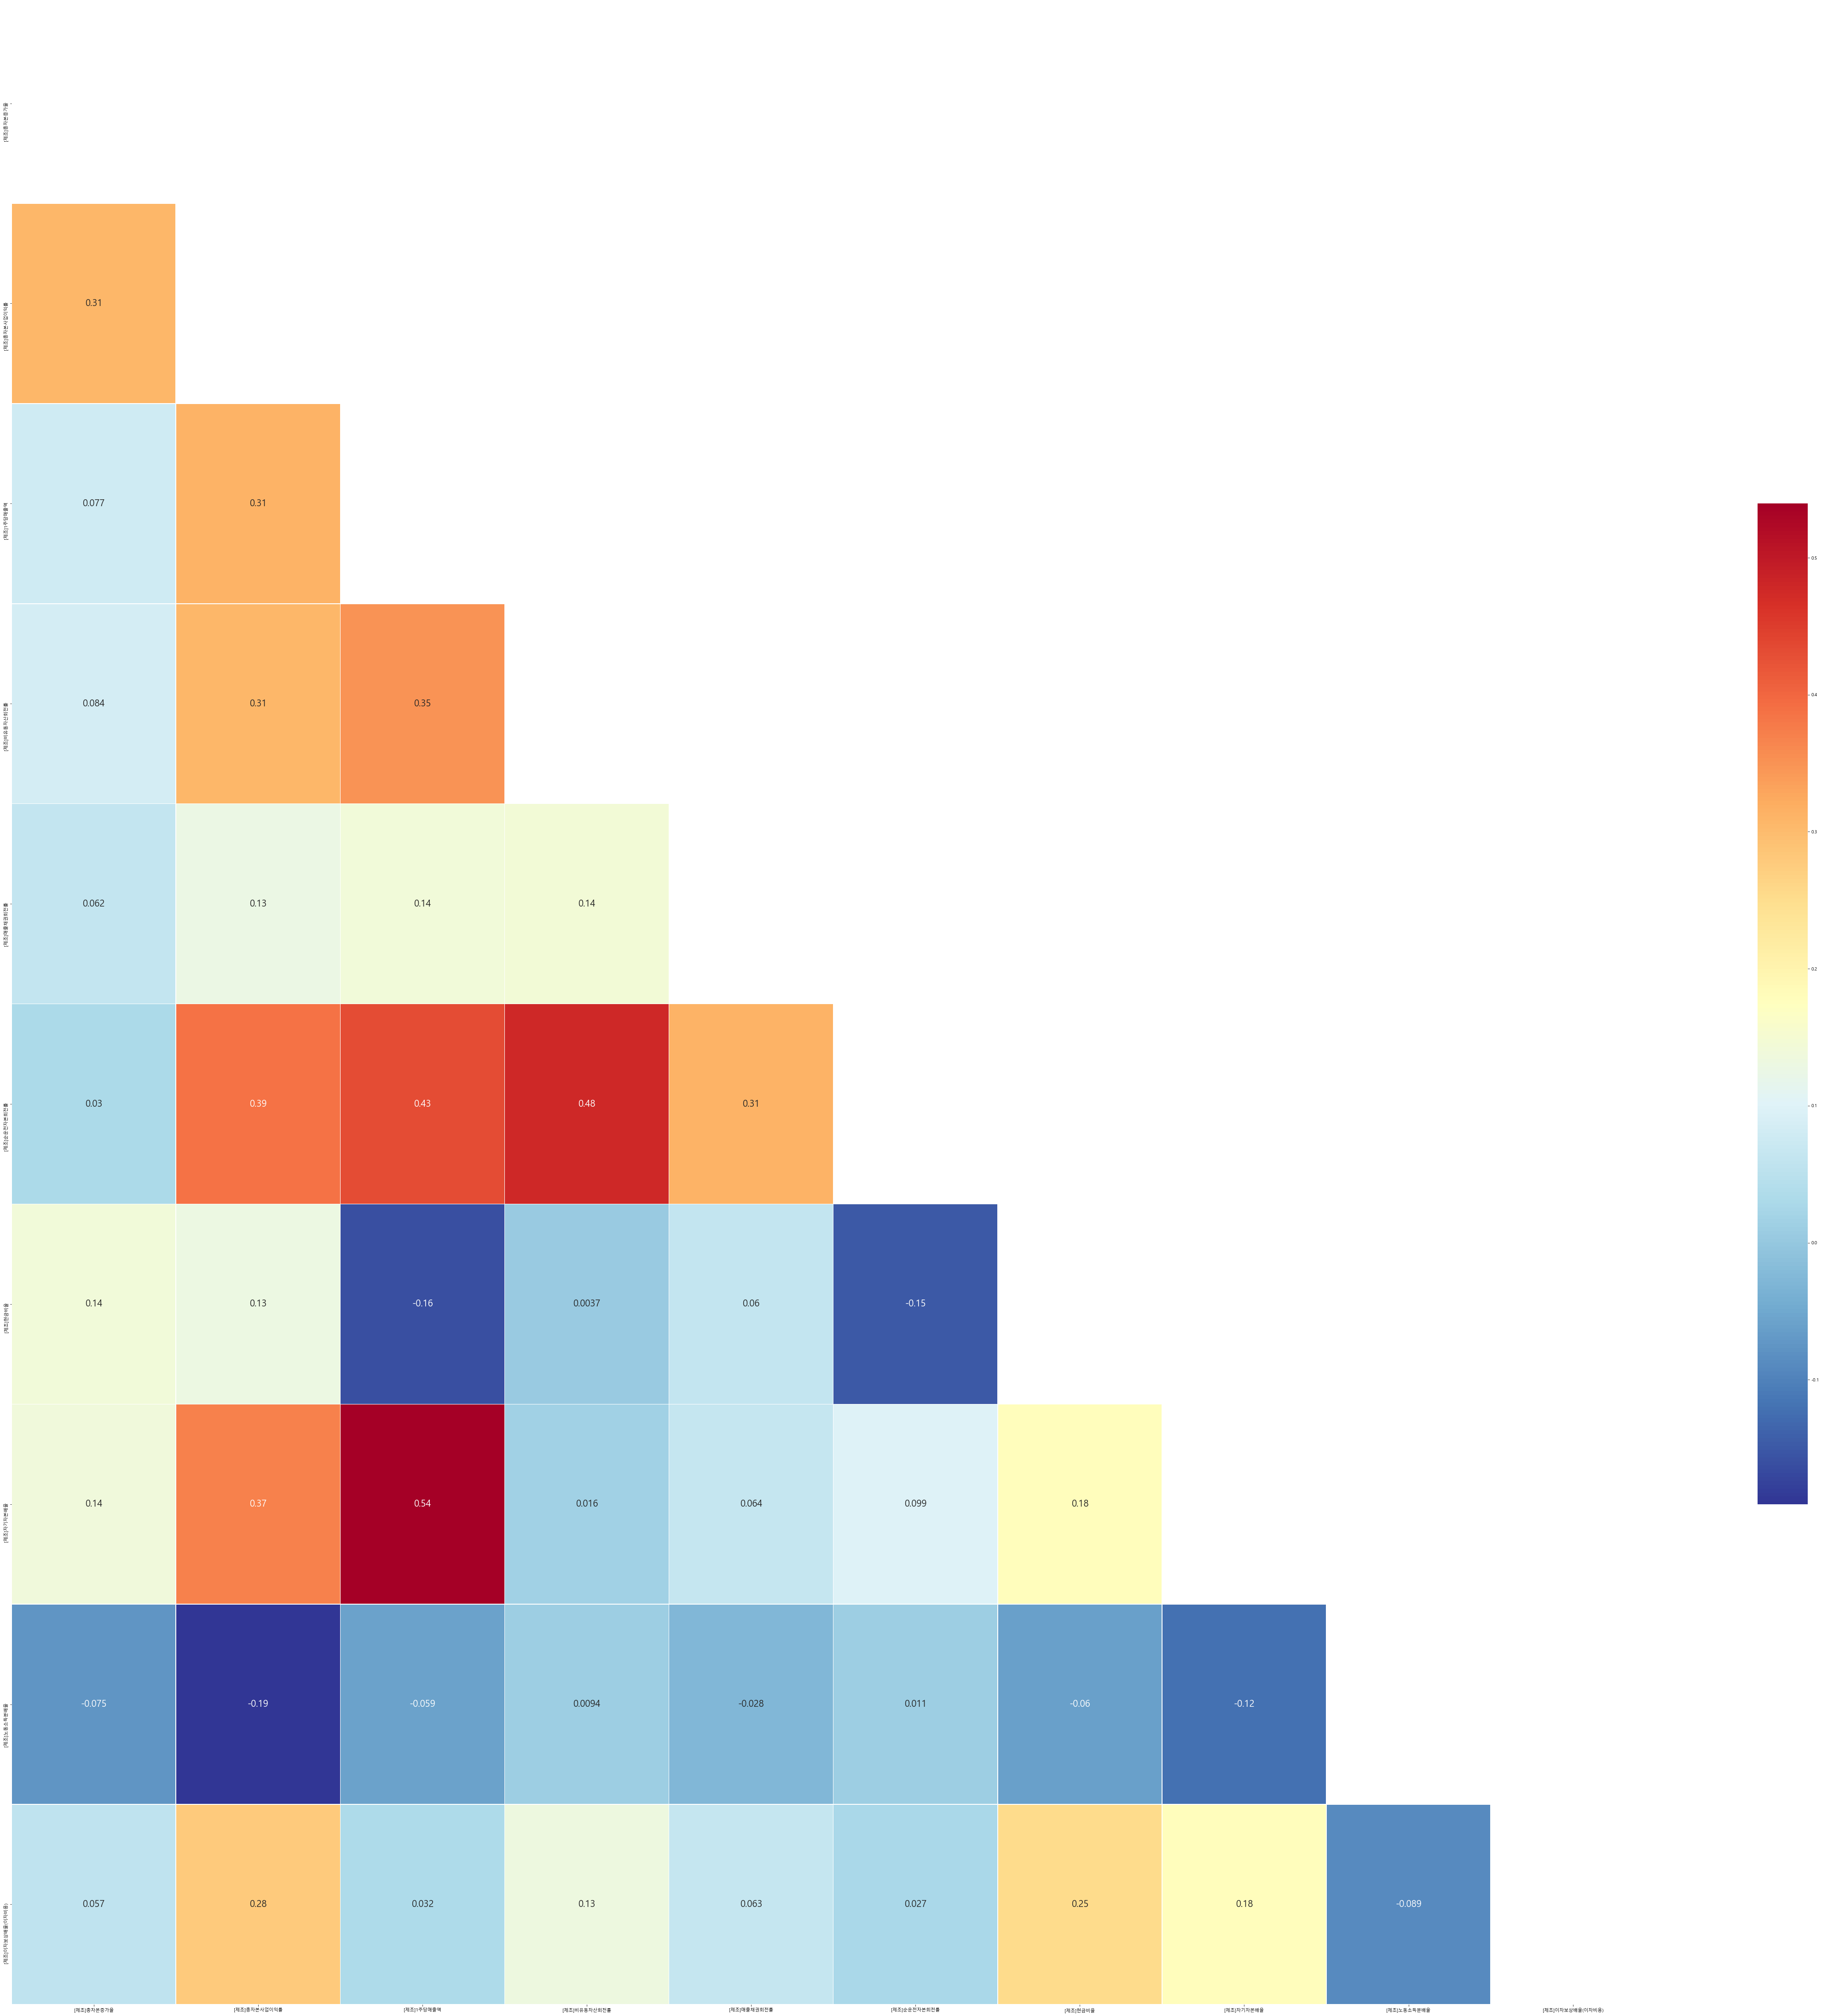

In [108]:
def corr_heatmap(dataset, method_option = 'pearson'):

    
    # heatmap 그리기
    mask_ut=np.triu(np.ones(dataset.corr().shape)).astype(bool) 
    plt.figure(figsize=(80,80))
    sns.heatmap(dataset.corr(method=method_option), annot = True, cmap = 'b', cbar_kws={"shrink": .5}, 
                annot_kws={"size": 20}, linewidths=.5, mask=mask_ut)
    plt.show()

# 함수 사용
corr_heatmap(df_LR_feature)